# Covid Clinical Data

In [24]:
#Dependencies:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
#Read in clinical csv file.
clinical_data_df = pd.read_csv('2021_01_20_covid_confirmed_cases.csv')
clinical_data_df.head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,4847,4879,4902,4970,4998,5075,5103,5154,5184,5198
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,15202,15327,15417,15572,15701,15841,16002,16176,16251,16346
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,1648,1658,1663,1679,1685,1696,1712,1723,1729,1730
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,2038,2051,2060,2090,2109,2113,2130,2144,2151,2162


In [3]:
#Read in population csv file.
population_data_df = pd.read_csv('2021_01_20_covid_county_population.csv')
population_data_df.head()

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394


In [4]:
#Select NY State data rows.
ny_clinical_data_df=clinical_data_df.loc[clinical_data_df['State']=='NY']
ny_population_df=population_data_df.loc[population_data_df['State']=='NY']


In [5]:
#Merge clinical and population dataframes and remove uneeded rows.
complete_clinical_df=pd.merge(ny_clinical_data_df, ny_population_df,on='countyFIPS', how='left')
clcomplete_clinical_df=complete_clinical_df.drop(complete_clinical_df.index[[0, 1, 2]])
#clcomplete_clinical_df.head()

,countyFIPS,County Name_x,State_x,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,County Name_y,State_y,population
3,36001,Albany County,NY,36,0,0,0,0,0,0,...,14763,14974,15230,15520,15771,15981,16168,Albany County,NY,305506.0
4,36003,Allegany County,NY,36,0,0,0,0,0,0,...,2226,2238,2257,2286,2313,2328,2347,Allegany County,NY,46091.0
5,36005,Bronx County,NY,36,0,0,0,0,0,0,...,94401,95345,96369,97803,99030,100115,101170,Bronx County,NY,1418207.0
6,36007,Broome County,NY,36,0,0,0,0,0,0,...,10095,10296,10457,10620,10743,10866,10981,Broome County,NY,190488.0
7,36009,Cattaraugus County,NY,36,0,0,0,0,0,0,...,3111,3156,3199,3253,3308,3344,3373,Cattaraugus County,NY,76117.0


In [6]:
#Pull out only needed columns.
trim_df= clcomplete_clinical_df[['countyFIPS', 'County Name_x', 'State_x', 'stateFIPS', '1/31/20', '2/29/20', '3/31/20', '4/30/20', '5/31/20', '6/30/20', '7/31/20', '8/31/20', '9/30/20', '10/31/20', '11/30/20', '12/31/20', 'population']]
trim_df.head()


,countyFIPS,County Name_x,State_x,stateFIPS,1/31/20,2/29/20,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/31/20,11/30/20,12/31/20,population
3,36001,Albany County,NY,36,0,0,226,1165,1860,2102,2503,2770,3120,3725,5816,11585,305506.0
4,36003,Allegany County,NY,36,0,0,7,35,45,59,74,89,114,342,1042,1831,46091.0
5,36005,Bronx County,NY,36,0,0,7814,37244,45253,47598,49573,51610,53091,55767,63997,82992,1418207.0
6,36007,Broome County,NY,36,0,0,38,284,566,716,1037,1307,1673,3710,5367,8157,190488.0
7,36009,Cattaraugus County,NY,36,0,0,6,47,88,123,158,205,276,536,1135,2498,76117.0


In [7]:
# Calculate new cases month to month.
just_county_num=trim_df[['County Name_x', '1/31/20',
       '2/29/20', '3/31/20', '4/30/20', '5/31/20', '6/30/20', '7/31/20',
       '8/31/20', '9/30/20', '10/31/20', '11/30/20', '12/31/20', 'population']]
#just_county_num.head()
new_cases=just_county_num.diff(axis=1)
new_cases['1/31/20'] =  new_cases['1/31/20'].replace(np.nan, 0)
new_cases['County Name_x']=trim_df['County Name_x']
new_cases=new_cases.rename(columns={'County Name_x': 'County Name'})
new_cases['population']=trim_df['population']
#new_cases.head()

,County Name,1/31/20,2/29/20,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/31/20,11/30/20,12/31/20,population
3,Albany County,0.0,0.0,226.0,939.0,695.0,242.0,401.0,267.0,350.0,605.0,2091.0,5769.0,305506.0
4,Allegany County,0.0,0.0,7.0,28.0,10.0,14.0,15.0,15.0,25.0,228.0,700.0,789.0,46091.0
5,Bronx County,0.0,0.0,7814.0,29430.0,8009.0,2345.0,1975.0,2037.0,1481.0,2676.0,8230.0,18995.0,1418207.0
6,Broome County,0.0,0.0,38.0,246.0,282.0,150.0,321.0,270.0,366.0,2037.0,1657.0,2790.0,190488.0
7,Cattaraugus County,0.0,0.0,6.0,41.0,41.0,35.0,35.0,47.0,71.0,260.0,599.0,1363.0,76117.0


In [8]:
# Create NY Metro, Suburbs, and Rural subsets.

ny_metro = ['Kings County', 'Bronx County','Richmond County', 'New York County','Queens County']
new_cases_metro = new_cases[new_cases['County Name'].isin (ny_metro)]

suburbs = ['Nassau County', 'Suffolk County','Westchester County', 'Rockland County']
new_cases_suburbs = new_cases[new_cases['County Name'].isin (suburbs)]

metro_suburbs = ['Nassau County', 'Suffolk County','Westchester County', 'Rockland County', 'Kings County', 'Bronx County','Richmond County', 'New York County','Queens County']
new_cases_rural = new_cases[~new_cases['County Name'].isin (metro_suburbs)]


,County Name,1/31/20,2/29/20,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/31/20,11/30/20,12/31/20,population
3,Albany County,0.0,0.0,226.0,939.0,695.0,242.0,401.0,267.0,350.0,605.0,2091.0,5769.0,305506.0
4,Allegany County,0.0,0.0,7.0,28.0,10.0,14.0,15.0,15.0,25.0,228.0,700.0,789.0,46091.0
6,Broome County,0.0,0.0,38.0,246.0,282.0,150.0,321.0,270.0,366.0,2037.0,1657.0,2790.0,190488.0
7,Cattaraugus County,0.0,0.0,6.0,41.0,41.0,35.0,35.0,47.0,71.0,260.0,599.0,1363.0,76117.0
8,Cayuga County,0.0,0.0,3.0,45.0,43.0,24.0,28.0,35.0,42.0,218.0,452.0,2004.0,76576.0


In [22]:
# Create series to plot

nc_rural=new_cases_rural.sum()
nc_rural=nc_rural.drop('County Name')
nc_rural=nc_rural.drop('population')

nc_metro=new_cases_metro.sum()
nc_metro=nc_metro.drop('County Name')
nc_metro=nc_metro.drop('population')

nc_suburbs=new_cases_suburbs.sum()
nc_suburbs=nc_suburbs.drop('County Name')
nc_suburbs=nc_suburbs.drop('population')


<function matplotlib.pyplot.show(*args, **kw)>

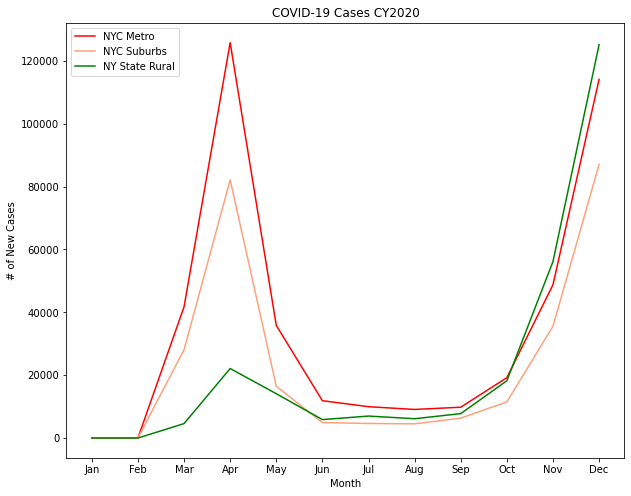

In [37]:
# Create line graph

xvals = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

y1vals = nc_metro
y2vals = nc_suburbs
y3vals = nc_rural
plt.figure(figsize=(10,8))
nyc_metro = plt.plot(xvals, y1vals, color="red", label="NYC Metro")
nyc_suburbs = plt.plot(xvals, y2vals, color="lightsalmon", label="NYC Suburbs")
ny_rural = plt.plot(xvals, y3vals, color="green", label="NY State Rural")


plt.title("COVID-19 Cases CY2020")
plt.xlabel("Month")
plt.ylabel("# of New Cases")
plt.legend(loc="best")


plt.show